> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 4: Data Understanding

## Outline

- Load and preview a real-world dataset
- Inspect structure and identify missing or unusual data
- Perform basic grouped summaries

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_04_data_understanding.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     |  Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1). |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [2]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


### 🔧 Try It Yourself – Part 1

1. Add one line of code to print the number of rows and columns.

In [11]:
df.shape

(197021, 17)

## Part 2: Inspecting, Cleaning & Removing Outliers

### Instructions:
- Identify missing values.
- Check data types are correct(e.g., dates, numeric columns).
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`.

### Think about:
- Are there missing values?
- Do the data types look appropriate?
- Do any numeric variables contain extreme or unusual values?



In [12]:
# Check for missing values
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1346
price,0
beds,6228
baths,155049
sqft,133433


In [13]:
#summary statistics
df.describe()

,date,year,price,beds,baths,sqft,room_in_apt,lat,lon
count,1.970210e+05,197021.000000,197021.000000,190793.000000,41972.000000,63588.000000,197021.000000,7424.000000,4196.000000
mean,2.009562e+07,2009.498013,2067.667848,1.876112,1.663943,1174.754576,0.001289,37.664866,-122.207930
std,4.470836e+04,4.478156,1092.775166,1.058409,0.665596,5033.363160,0.035882,0.347246,0.783762
min,2.000090e+07,2000.000000,650.000000,0.000000,1.000000,80.000000,0.000000,33.570100,-123.196500
25%,2.005022e+07,2005.000000,1299.000000,1.000000,1.000000,750.000000,0.000000,37.398839,-122.422373
50%,2.011092e+07,2011.000000,1800.000000,2.000000,2.000000,1000.000000,0.000000,37.755261,-122.260880
75%,2.012080e+07,2012.000000,2500.000000,2.000000,2.000000,1340.000000,0.000000,37.797323,-121.994448
max,2.018072e+07,2018.000000,7500.000000,12.000000,6.500000,900000.000000,1.000000,40.434945,-74.198019


In [14]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


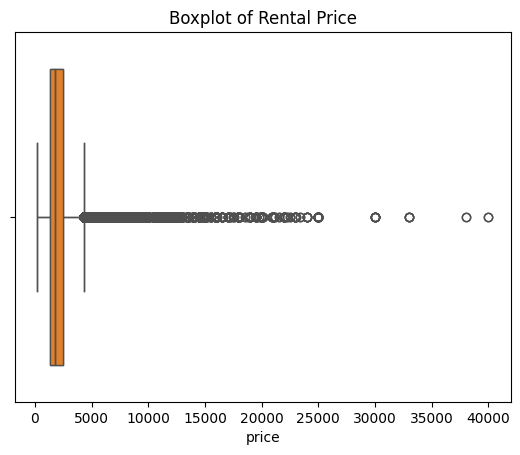

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of price
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show(sns.boxplot(x=df['price']))

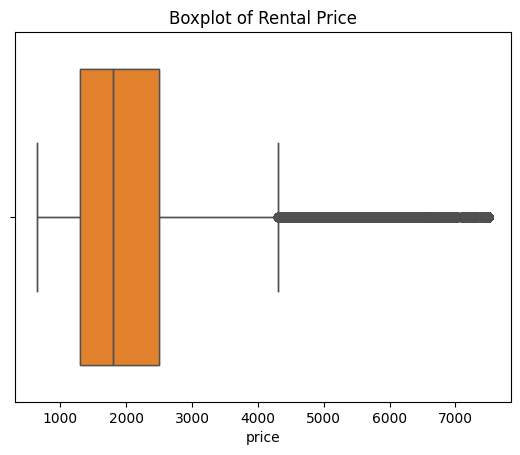

In [6]:
# Remove price outliers (1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]
show = sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show(sns.boxplot(x=df['price']))

### 🔧 Try It Yourself – Part 2

1. Use `.describe()` and a boxplot to check for outliers in **square footage (`sqft`)**.

2. What patterns or issues do you see with square footage values? Is there anything unusual?


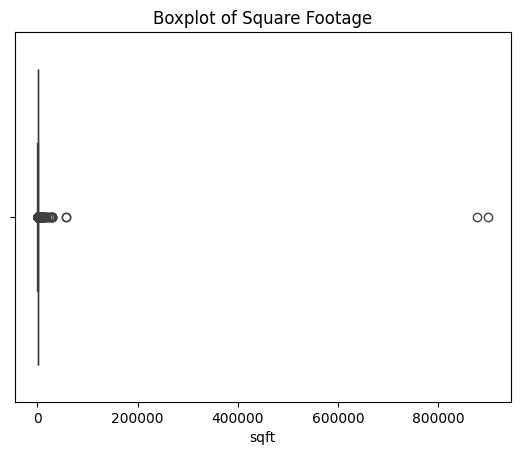

In [7]:
# Add code here 🔧
df[['sqft']].describe()
plt.title("Boxplot of Square Footage")
plt.show(sns.boxplot(x=df['sqft']))

🔧 Add comment here:There are a couple outliers that are more than 800000 square feet. That seems like it may be a mistake or misinput.

## Part 3: Basic Exploration

Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [8]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

,price
nhood,
inverness,5310.000000
tiburon / belvedere,3470.911197
SOMA / south beach,3450.726223
financial district,3431.484935
saratoga,3393.803279
west portal / forest hills,3302.753388
NOPA,3186.456667
pacific heights,3022.314860
candlestick point,3011.316239


In [9]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,54264
san jose,13564
oakland,9308
santa rosa,6163
santa cruz,5407
san mateo,5094
sunnyvale,4480
mountain view,4382
santa clara,4132


### 🔧 Try It Yourself – Part 3

Explore the data by performing both of the following:

1. Group the listings by `year` and calculate the average price for each year.
2. Use `.value_counts()` on the `room_in_apt` column to see how common room rentals are.

3. Add a short comment or markdown cell describing any trends or insights you found.


In [10]:
# Add code here 🔧
df.groupby('year')['price'].mean().sort_values(ascending=False).head(10)
df['room_in_apt'].value_counts().head(10)

,count
room_in_apt,
0,196767
1,254


🔧 Add comment here:There are more renting an entire apratment than renting a single room.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [15]:
!jupyter nbconvert --to html "lab_04_AndradeLeslie.ipynb"

[NbConvertApp] Converting notebook lab_04_AndradeLeslie.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 369709 bytes to lab_04_AndradeLeslie.html
